In [1]:
import os
import importlib
import pickle
import pandas as pd

In [2]:
os.getcwd()

'C:\\Users\\aozcan\\PycharmProjects\\trx_forecast'

In [3]:
import sys
sys.path.append(os.getcwd())

In [4]:
import utils
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\aozcan\\PycharmProjects\\trx_forecast\\utils.py'>

In [5]:
WORK_DIR = os.getcwd()

In [6]:
DATA_PATH = os.path.join("./data")
CAT_PATH = os.path.join(DATA_PATH, "category_list.csv")
ITEM_PATH = os.path.join(DATA_PATH, "item_list.csv")
SHOP_PATH = os.path.join(DATA_PATH, "shop_list.csv")
TRX_PATH = os.path.join(DATA_PATH, "transaction.csv")


In [125]:
item_df = pd.read_csv(ITEM_PATH, index_col=0)
cat_df = pd.read_csv(CAT_PATH, index_col=0)
shop_df = pd.read_csv(SHOP_PATH, index_col=0)
trx_df = pd.read_csv(TRX_PATH, index_col=0)

In [8]:
item_df.head()

,item_name,item_id,item_category_id
0,! IN THE GRIP OF GLAMOUR (PLAST.) D,100000,1040
1,! ABBYY FineReader 12 Professional Edition Ful...,100001,1076
2,IN THE SPOTLIGHT (UNV) D,100002,1040
3,BLUE WAVE (Univ) D,100003,1040
4,BOX (GLASS) D,100004,1040


In [9]:
utils.check_df(cat_df)

##################### Shape #####################
(84, 2)
##################### Types #####################
item_category_name    object
item_category_id       int64
dtype: object
##################### Head #####################
         item_category_name  item_category_id
0  PC - Headsets/Headphones              1000
1         Accessories - PS2              1001
2         Accessories - PS3              1002
3         Accessories - PS4              1003
4         Accessories - PSP              1004
##################### Tail #####################
     item_category_name  item_category_id
79              Service              1079
80    Service - Tickets              1080
81   Pure media (spire)              1081
82  Blank media (piece)              1082
83            Batteries              1083
##################### NA #####################
item_category_name    0
item_category_id      0
dtype: int64
##################### Quantiles #####################
                  count    mean 

In [10]:
utils.check_df(item_df) # will create v_item_lookup

##################### Shape #####################
(22170, 3)
##################### Types #####################
item_name           object
item_id              int64
item_category_id     int64
dtype: object
##################### Head #####################
                                           item_name  item_id  item_category_id
0        ! IN THE GRIP OF GLAMOUR (PLAST.)         D   100000              1040
1  ! ABBYY FineReader 12 Professional Edition Ful...   100001              1076
2                           IN THE SPOTLIGHT (UNV) D   100002              1040
3                                 BLUE WAVE (Univ) D   100003              1040
4                                      BOX (GLASS) D   100004              1040
##################### Tail #####################
                                               item_name  item_id  item_category_id
22165             Nuclear Titbit 2 [PC, Digital Version]   122165              1031
22166     1C:Enterprise Query Language [Digital 

In [35]:
grouper = trx_df.groupby([pd.Grouper(freq='ME'), 'shop',"item"])

In [37]:
ss = grouper["amount"].sum()

In [42]:
ss = ss.reset_index()

In [33]:
trx_df.groupby(["shop","item"]).resample("M").sum()

C:\Users\aozcan\AppData\Local\Temp\ipykernel_13244\1752499526.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trx_df.groupby(["shop","item"]).resample("M").sum()

KeyboardInterrupt



In [31]:
trx_df["date"] = pd.to_datetime(trx_df["date"], format ="%d.%m.%Y")

In [32]:
trx_df.set_index("date", inplace =True)

In [23]:
trx_df=trx_df.resample("ME").sum()

In [30]:
trx_df.columns

Index(['date', 'shop', 'item', 'price', 'amount'], dtype='object')

In [48]:
ss[(ss["date"] > "2015-08-30") & (ss["amount"] > 100)]

,date,shop,item,amount
1526898,2015-08-31,124,120949,323.0
1529164,2015-08-31,127,120949,284.0
1531293,2015-08-31,130,120949,436.0
1533210,2015-08-31,136,120949,105.0
1533993,2015-08-31,137,120949,168.0
1536595,2015-08-31,141,120949,368.0
1538576,2015-08-31,145,120949,129.0
1539470,2015-08-31,146,120949,149.0
1543915,2015-08-31,154,109247,157.0
1543917,2015-08-31,154,109251,193.0


In [51]:
ss[(ss["shop"] == 154) & (ss["item"] == 109247)]

,date,shop,item,amount
1413135,2015-04-30,154,109247,7.0
1445470,2015-05-31,154,109247,47.0
1477101,2015-06-30,154,109247,40.0
1510584,2015-07-31,154,109247,60.0
1543915,2015-08-31,154,109247,157.0
1574409,2015-09-30,154,109247,716.0


In [52]:
ss = item_df.groupby("item_id")["item_category_id"].count()

In [53]:
ss.count()

22170

In [54]:
utils.check_df(shop_df)

##################### Shape #####################
(60, 2)
##################### Types #####################
shop_name    object
shop_id       int64
dtype: object
##################### Head #####################
                         shop_name  shop_id
0  !Yakutsk Ordzhonikidze, 56 fran       99
1  !Yakutsk, TC "Tsentralnyi" fran      100
2                 Адыгея ТЦ "Мега"      101
3    Balashikha TRC "Oktay-Konmir"      102
4         Volzhsky TC "Volga Mall"      103
##################### Tail #####################
                      shop_name  shop_id
55  1C-Online Digital Warehouse      154
56       Chekhov SEC "Karnaval"      155
57   Yakutsk, Ordzhonikidze, 56      156
58     Yakutsk, TC "Tsentralny"      157
59       Yaroslavl, TC "Altair"      158
##################### NA #####################
shop_name    0
shop_id      0
dtype: int64
##################### Quantiles #####################
         count   mean        std   min    0%      5%    50%     95%     99%   100%    

In [55]:
print("unique num:", shop_df["shop_name"].nunique())
shop_df["shop_name"].unique()[:5] # lots of feature engineering here

unique num: 60


array(['!Yakutsk Ordzhonikidze, 56 fran',
       '!Yakutsk, TC "Tsentralnyi" fran', 'Адыгея ТЦ "Мега"',
       'Balashikha TRC "Oktay-Konmir"', 'Volzhsky TC "Volga Mall"'],
      dtype=object)

In [56]:
utils.check_df(trx_df)

##################### Shape #####################
(2882335, 4)
##################### Types #####################
shop        int64
item        int64
price     float64
amount    float64
dtype: object
##################### Head #####################
            shop    item   price  amount
date                                    
2013-01-02   158  122154  3244.0     1.0
2013-01-03   124  102552  2920.0     1.0
2013-01-05   124  102552  2920.0    -1.0
2013-01-06   124  102554  5550.0     1.0
2013-01-15   124  102555  3569.0     1.0
##################### Tail #####################
            shop    item   price  amount
date                                    
2015-09-27   124  121022  5842.0     1.0
2015-09-19   124  121105  5842.0     1.0
2015-09-30   124  121088  4219.0     1.0
2015-09-08   124  120990  4219.0     1.0
2015-09-25   124  120303  1296.0     1.0
##################### NA #####################
shop      0
item      0
price     0
amount    0
dtype: int64
#####################

In [100]:
trx_df.head(1)

,shop,item,amount,item_name,item_category_id
date,,,,,
2013-01-02,158,122154,1.0,PHENOMENON 2012 (BD),1037


In [126]:
trx_df = trx_df.merge(item_df, left_on ="item", right_on="item_id", how="inner")

In [127]:
trx_df["date"] = pd.to_datetime(trx_df["date"], format ="%d.%m.%Y")

In [128]:
ss = trx_df[trx_df["date"] > "2014-09-30"]

In [124]:
ss.head()

,date,shop,item,price,amount
2026848,2014-10-31,125,106183,6491.0,1.0
2026849,2014-10-01,127,111391,2920.0,1.0
2026850,2014-10-02,127,111389,2920.0,1.0
2026851,2014-10-23,127,111243,485.0,1.0
2026852,2014-10-21,127,111242,322.0,1.0


In [129]:
ss.head()

,date,shop,item,price,amount,item_name,item_id,item_category_id
2026848,2014-10-31,125,106183,6491.0,1.0,Ryse: Son of Rome GOTY [Xbox One] [5F2-00019],106183,1024
2026849,2014-10-01,127,111391,2920.0,1.0,Bad Repute 2 (Essentials) [PS3],111391,1019
2026850,2014-10-02,127,111389,2920.0,1.0,Notorious (Essentials) [PS3],111389,1019
2026851,2014-10-23,127,111243,485.0,1.0,DUBROVSKY (BD),111243,1037
2026852,2014-10-21,127,111242,322.0,1.0,DUBROVSKIY,111242,1040


In [132]:
ss.drop(columns=["price"], axis=1, inplace=True)

C:\Users\aozcan\AppData\Local\Temp\ipykernel_13244\899419332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss.drop(columns=["price"], axis=1, inplace=True)


In [133]:
ss.drop(columns=["item_id"], axis=1, inplace=True)

C:\Users\aozcan\AppData\Local\Temp\ipykernel_13244\2738794288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss.drop(columns=["item_id"], axis=1, inplace=True)


In [135]:
ss.set_index("date", inplace = True)

In [136]:
grouper = ss.groupby([pd.Grouper(freq='ME'), 'shop',"item", "item_name","item_category_id"])

In [140]:
aa = grouper["amount"].sum().reset_index()

In [144]:
aa.head()

,date,shop,item,item_name,item_category_id,amount
0,2014-10-31,101,100032,1+1,1040,2.0
1,2014-10-31,101,100464,1C:Bibl. Developer. Development of complex rep...,1049,1.0
2,2014-10-31,101,100482,1C:Accounting 8. Basic version,1073,1.0
3,2014-10-31,101,100486,1C:Accounting 8. Tutorial version. Edition 8.,1073,1.0
4,2014-10-31,101,100491,1C:Money 8,1073,1.0


In [148]:
utils.check_df(aa)

##################### Shape #####################
(469949, 6)
##################### Types #####################
date                datetime64[ns]
shop                         int64
item                         int64
item_name                   object
item_category_id             int64
amount                     float64
dtype: object
##################### Head #####################
        date  shop    item                                          item_name  item_category_id  amount
0 2014-10-31   101  100032                                                1+1              1040     2.0
1 2014-10-31   101  100464  1C:Bibl. Developer. Development of complex rep...              1049     1.0
2 2014-10-31   101  100482                     1C:Accounting 8. Basic version              1073     1.0
3 2014-10-31   101  100486      1C:Accounting 8. Tutorial version. Edition 8.              1073     1.0
4 2014-10-31   101  100491                                         1C:Money 8              1073

In [146]:
aa.amount.describe()

count   469949.0
mean         2.3
std         10.1
min         -2.0
25%          1.0
50%          1.0
75%          2.0
max       1644.0
Name: amount, dtype: float64

In [151]:
bb = aa.groupby(["shop","item","item_category_id"])["amount"].sum()

In [153]:
bb = bb.reset_index()

In [156]:
bb["amount"].describe()

count   170484.0
mean         6.4
std         37.7
min         -1.0
25%          1.0
50%          2.0
75%          5.0
max       6304.0
Name: amount, dtype: float64

<Axes: >

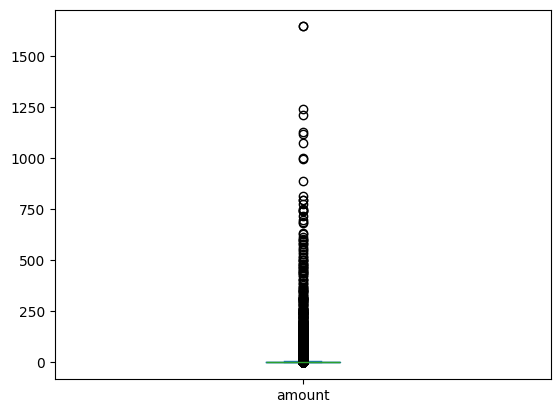

In [145]:
aa.amount.plot(kind="box")  # item_category_id : count of item_cat_id

## Store Basis EDA

<Axes: >

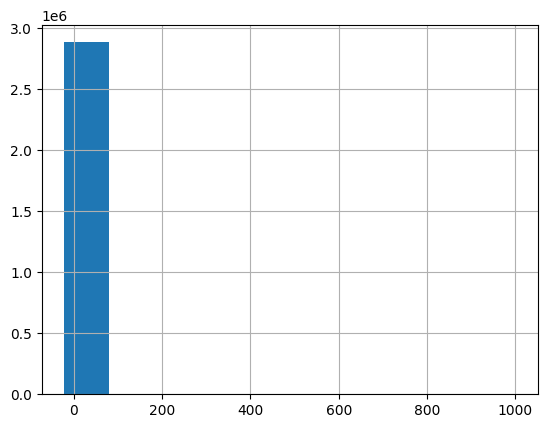

In [57]:
trx_df["amount"].hist(bins = 10)

In [58]:
print("number unique shop:", trx_df["shop"].nunique())
trx_df["shop"].unique()[:5]

number unique shop: 59


array([158, 124, 123, 122, 118], dtype=int64)

In [59]:
item_df.columns

Index(['item_name', 'item_id', 'item_category_id'], dtype='object')

In [60]:
item_cat_df = pd.merge(cat_df, item_df, left_on = ["item_category_id"], right_on = ["item_category_id"], how = "inner")

In [62]:
item_df.count()

item_name           22170
item_id             22170
item_category_id    22170
dtype: int64

In [64]:
trx_df["net"] = trx_df["amount"] * trx_df["price"]

In [65]:
shop_format_df = trx_df.groupby("shop").agg({"shop": "count","net": "sum", "amount": "sum"})

In [66]:
shop_format_df["mean_income_per_item"] = shop_format_df["net"] / shop_format_df["amount"]

<Axes: >

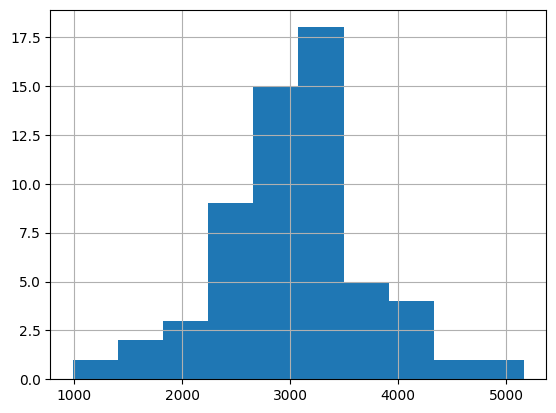

In [67]:
shop_format_df["mean_income_per_item"].hist(bins = 10) # i will flag 3 cluster to model that data

In [68]:
shop_format_df["mean_income_per_trx"] = shop_format_df["net"] / shop_format_df["shop"]

<Axes: >

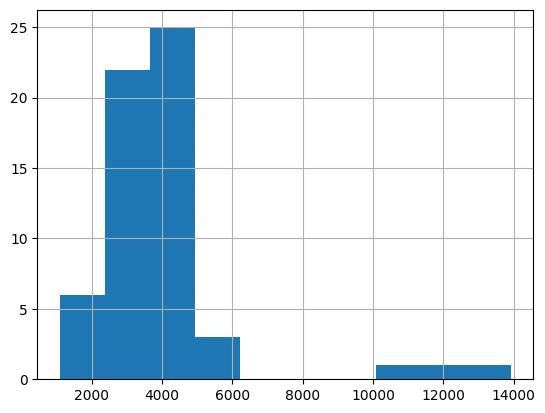

In [69]:
shop_format_df.mean_income_per_trx.hist(bins = 10) # we can use k means to segment stores then
# time series operations

## Cat Basis EDA


In [70]:
trx_cat_df = trx_df.merge(item_cat_df, left_on = ["item"], right_on = ["item_id"], how = "inner")

In [71]:
trx_cat_df.drop(columns ="item_id", inplace = True)

In [72]:
trx_cat_df.count()

shop                  2882335
item                  2882335
price                 2882335
amount                2882335
net                   2882335
item_category_name    2882335
item_category_id      2882335
item_name             2882335
dtype: int64

In [76]:
pd.set_option('display.float_format', '{:.1f}'.format)

In [77]:
# agg on cat group to analyze
trx_cat_temp = trx_cat_df.groupby("item_category_id").agg({"item_category_id":"count","amount": "sum", "net": "sum"})

In [78]:
trx_cat_temp["mean_income_per_trx"] = trx_cat_temp["net"] / trx_cat_temp["amount"]

<Axes: >

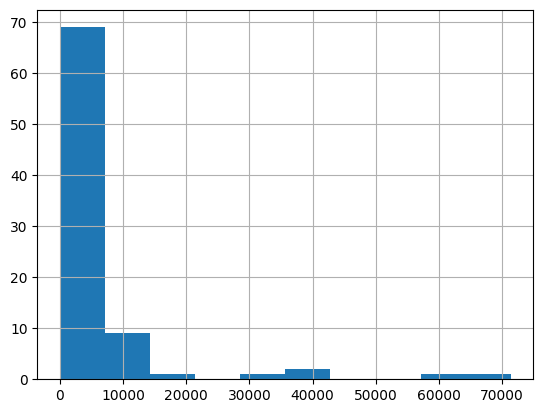

In [79]:
trx_cat_temp["mean_income_per_trx"].hist(bins = 10)

In [80]:
trx_cat_temp[trx_cat_temp.item_category_id > 500000] # item_category_id : count of item_cat_id

,item_category_id,amount,net,mean_income_per_trx
item_category_id,,,,
1040,557379,626491.0,545199369.0,870.2


In [81]:
trx_cat_df[trx_cat_df["item_category_id"] == 1000]

,shop,item,price,amount,net,item_category_name,item_category_id,item_name
5558,124,116257,481.0,1.0,481.0,PC - Headsets/Headphones,1000,RITMIX RH-124 Black Headphones
182616,99,116255,303.0,1.0,303.0,PC - Headsets/Headphones,1000,PHILIPS SBC HC8680 headphones
439377,137,116256,74.0,1.0,74.0,PC - Headsets/Headphones,1000,RITMIX RH-120 Headphones


In [83]:
trx_cat_temp.head(1)

,item_category_id,amount,net,mean_income_per_trx
item_category_id,,,,
1000,3,3.0,858.0,286.0


In [ ]:
trx_cat_df.index = trx_cat_df.date

In [ ]:
trx_cat_df.index = pd.to_datetime(trx_cat_df.index, format = "%d.%m.%Y")

In [ ]:
trx_cat_df.drop(columns = ["date"], inplace = True)

In [ ]:
grouper = trx_cat_df.groupby([pd.Grouper(freq='ME'), 'shop'])

In [ ]:
seasonality_stores = grouper["amount"].count()

In [ ]:
seasonality_stores = seasonality_stores.reset_index()

In [ ]:
seasonality_stores = seasonality_stores.sort_values(by = "shop", ascending = True)

In [ ]:
seasonality_stores.head(5)

In [ ]:
seasonality_stores.groupby("shop").count().plot(kind = "bar") # we could detect is_active stores,
# and seasonal stores


In [ ]:
seasonality_stores.date.min()

In [ ]:
seasonality_stores.date.max()

In [ ]:
trx_cat_temp.head(1)

## Decision For Sake of Time

In [ ]:
trx_cat_temp.item_category_id.plot(kind="box")  # item_category_id : count of item_cat_id

In [ ]:
utils.check_df(trx_cat_temp)

In [ ]:
trx_cat_temp["cat_cluster"] = pd.qcut(trx_cat_temp["item_category_id"], q=[0, .5, .75, 1.], labels = False)

In [ ]:
trx_cat_temp.rename(columns = {"item_category_id":"count_of_sales"}, inplace = True)

In [ ]:
trx_cat_temp.reset_index(drop = False, inplace = True)

In [ ]:
trx_cat_temp.head(1)

In [ ]:
trx_cat_df.head(1)

In [ ]:
trx_cat_df.reset_index(drop = False, inplace = True)

In [ ]:
trx_cat_df.date.max() # max_date 2015-09-30

In [ ]:
max_df = trx_cat_df.groupby("shop")["date"].max().reset_index()

In [ ]:
from datetime import date, timedelta

In [ ]:
max_df["date"].head()

In [ ]:
pd.to_datetime("2014-09-30", format='%Y-%m-%d')

In [ ]:
max_df = max_df[max_df["date"] >= pd.to_datetime("2015-08-30", format='%Y-%m-%d')]

In [ ]:
trx_cat_df = trx_cat_df.reset_index().merge(trx_cat_temp[["cat_cluster", "item_category_id"]], on=["item_category_id"], how="inner").set_index("date")

In [ ]:
trx_cat_df.merge(max_df, on = "shop", how = "inner")

In [ ]:
trx_cat_df.head(1)

## Data Prep

In [ ]:
# package documentation: https://unit8co.github.io/darts/generated_api/darts.timeseries.html
from darts import TimeSeries
import darts

In [ ]:
darts.__version__

In [ ]:
trx_cat_df.shop.nunique()

In [ ]:
trx_cat_df.head(1)

In [ ]:
grouper = trx_cat_df.groupby([pd.Grouper(freq='ME'), 'shop', "item", "item_category_id", "cat_cluster"])

In [ ]:
ts_df = grouper["amount"].sum()

In [ ]:
ts_df = ts_df.reset_index()

In [ ]:
date_index = pd.date_range(ts_df.date.min(), ts_df.date.max(), freq="ME")

In [ ]:
dt_i = date_index.to_frame().reset_index(drop=True)

In [ ]:
dt_i.columns = ["date"]

In [ ]:
duos = ts_df[["shop","item","item_category_id", "cat_cluster"]]

In [ ]:
duos.count()

In [ ]:
duos.drop_duplicates(inplace=True)

In [ ]:
dt_i["key"] = 0

In [ ]:
duos["key"] = 0

In [ ]:
left = dt_i.merge(duos, on="key", how="outer").drop("key", axis=1)

In [ ]:
left.count()

In [ ]:
left = left.merge(ts_df, on=["date","shop","item","item_category_id","cat_cluster"], how="outer")

In [ ]:
left.count()

In [ ]:
left.head(20)

In [ ]:
ts = TimeSeries.from_group_dataframe(df=left,
                                     group_cols=['item', "shop", "item_category_id", "cat_cluster"],
                                     freq="ME",
                                     n_jobs=-1,
                                     verbose=True,
                                     fillna_value=0,
                                     value_cols=["amount"],
                                     time_col="date") # target column
                                      # date column not passed index will be used

In [ ]:
with open("./data/ts", "wb") as file:
    pickle.dump(ts, file)

In [ ]:
import multiprocessing

multiprocessing.cpu_count()